In [ ]:
import torch
import torchvision
import torchvision.transforms as transforms
batch_size = 20

transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform)

trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size,
                                          shuffle=True, num_workers=2)

testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transform)

testloader = torch.utils.data.DataLoader(testset, batch_size=batch_size,
                                         shuffle=False, num_workers=2)

classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

  0%|          | 0/170498071 [00:00<?, ?it/s]

Extracting ./data/cifar-10-python.tar.gz to ./data
Files already downloaded and verified


In [ ]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
device

device(type='cuda')

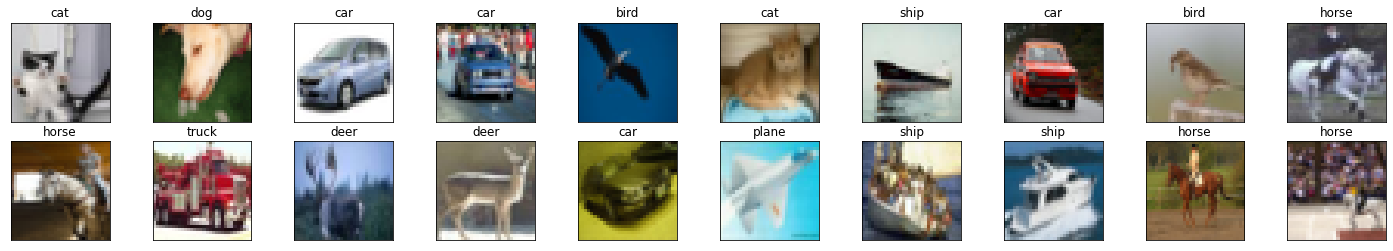

In [ ]:
# show images

import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline


def imshow(img):
    img = img / 2 + 0.5  
    plt.imshow(np.transpose(img, (1, 2, 0))) 

dataiter = iter(trainloader)
images, labels = dataiter.next()
images = images.numpy()

fig = plt.figure(figsize=(25, 4))

for idx in np.arange(batch_size):
 ax = fig.add_subplot(2, batch_size/2, idx+1, xticks=[], yticks=[])
 imshow(images[idx])
 ax.set_title(classes[labels[idx]])

In [ ]:
import torch.nn as nn
import torch.nn.functional as F

class Net(nn.Module):
   

    def __init__(self):
        
        super(Net, self).__init__()

        self.conv_layer = nn.Sequential(

            # Conv Layer block 1
            nn.Conv2d(in_channels=3, out_channels=16, kernel_size=3, padding=1),
            nn.BatchNorm2d(16),
            nn.ReLU(inplace=True),
            nn.Conv2d(in_channels=16, out_channels=16, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=2, stride=2),

            # Conv Layer block 2
            nn.Conv2d(in_channels=16, out_channels=32, kernel_size=3, padding=1),
            nn.BatchNorm2d(32),
            nn.ReLU(inplace=True),
            nn.Conv2d(in_channels=32, out_channels=32, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=2, stride=2),
            nn.Dropout2d(p=0.05),

            # Conv Layer block 3
            nn.Conv2d(in_channels=32, out_channels=64, kernel_size=3, padding=1),
            nn.BatchNorm2d(64),
            nn.ReLU(inplace=True),
            nn.Conv2d(in_channels=64, out_channels=64, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=2, stride=2),
        )


        self.fc_layer = nn.Sequential(
            nn.Dropout(p=0.25),
            nn.Linear(1024, 512),
            nn.ReLU(inplace=True),
            nn.Linear(512, 256),
            nn.ReLU(inplace=True),
            nn.Dropout(p=0.25),
            nn.Linear(256, 10)
        )


    def forward(self, x):
        """Perform forward."""
        
        # conv layers
        x = self.conv_layer(x)
        
        # flatten
        x = x.view(x.size(0), -1)
        
        # fc layer
        x = self.fc_layer(x)

        return x

model = Net()
model

Net(
  (conv_layer): Sequential(
    (0): Conv2d(3, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): Conv2d(16, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (4): ReLU(inplace=True)
    (5): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): Conv2d(16, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (7): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (8): ReLU(inplace=True)
    (9): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (10): ReLU(inplace=True)
    (11): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (12): Dropout2d(p=0.05, inplace=False)
    (13): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (14): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)

In [ ]:
import torch.optim as optim

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.001, momentum=0.9)
#optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

In [ ]:
n_epochs = 10

model.train()

for epoch in range(n_epochs):
  train_loss = 0.0

  # train model
  for data, target in trainloader:# train loader에서 알아서 data,target 뽑아옴
    optimizer.zero_grad() # 이따 쓸 gradient 값 0으로 초기화

    # forward pass : compute predicted output
    output = model(data)

    # compute the loss
    loss = criterion(output,target) 

    loss.backward()

    # parameter update
    optimizer.step() # 업데이트 한번 실행
    train_loss += loss.item()*data.size(0) 
  
  train_loss = train_loss /  len(trainloader.sampler)
  print('EPOCH : {}\t Training Loss : {:.6}'.format(epoch+1, train_loss))

EPOCH : 1	 Training Loss : 1.74208
EPOCH : 2	 Training Loss : 1.26334
EPOCH : 3	 Training Loss : 1.04785
EPOCH : 4	 Training Loss : 0.919997
EPOCH : 5	 Training Loss : 0.830353
EPOCH : 6	 Training Loss : 0.770494
EPOCH : 7	 Training Loss : 0.717396
EPOCH : 8	 Training Loss : 0.67462
EPOCH : 9	 Training Loss : 0.638347
EPOCH : 10	 Training Loss : 0.605365


In [ ]:
class_correct = list(0. for i in range(10)) 
class_total_number = list(0. for i in range(10))
model.eval()

for data, target in testloader:

  val, pred = torch.max(output,1)
  correct = pred.eq(target.data.view_as(pred)) 

  for i in range(len(target)):
    label = target.data[i] 
    class_correct[label] += correct[i].item()
    class_total_number[label] += 1

for i in range(10):
  if class_total_number[i] > 0:
     print(i, ':' ,100*class_correct[i]/class_total_number[i], '(', np.sum(class_correct[i]), '/', np.sum(class_total_number[i]),')' )

print('overall accurancy : ' , 100.0 * np.sum(class_correct)/ np.sum(class_total_number))
print('overall accurancy : ' , np.sum(class_correct), '/', np.sum(class_total_number))

  


0 : 18.9 ( 189.0 / 1000.0 )
1 : 9.6 ( 96.0 / 1000.0 )
2 : 13.4 ( 134.0 / 1000.0 )
3 : 0.0 ( 0.0 / 1000.0 )
4 : 0.0 ( 0.0 / 1000.0 )
5 : 17.4 ( 174.0 / 1000.0 )
6 : 20.0 ( 200.0 / 1000.0 )
7 : 14.3 ( 143.0 / 1000.0 )
8 : 0.0 ( 0.0 / 1000.0 )
9 : 5.1 ( 51.0 / 1000.0 )
overall accurancy :  9.87
overall accurancy :  987.0 / 10000.0


In [ ]:
# track test loss
test_loss = 0.0
class_correct = list(0. for i in range(10))
class_total = list(0. for i in range(10))

model.eval()
# iterate over test data
for data, target in testloader:
   
    # forward pass: compute predicted outputs by passing inputs to the model
    output = model(data)
    # calculate the batch loss
    loss = criterion(output, target)
    # update test loss 
    test_loss += loss.item()*data.size(0)
    # convert output probabilities to predicted class
    _, pred = torch.max(output, 1)    
    # compare predictions to true label
    correct_tensor = pred.eq(target.data.view_as(pred))
    correct = np.squeeze(correct_tensor.numpy())
    # calculate test accuracy for each object class
    for i in range(batch_size):
        label = target.data[i]
        class_correct[label] += correct[i].item()
        class_total[label] += 1

# average test loss
test_loss = test_loss/len(testloader.dataset)
print('Test Loss: {:.6f}\n'.format(test_loss))

for i in range(10):
    if class_total[i] > 0:
        print('Test Accuracy of %5s: %2d%% (%2d/%2d)' % (
            classes[i], 100 * class_correct[i] / class_total[i],
            np.sum(class_correct[i]), np.sum(class_total[i])))
    else:
        print('Test Accuracy of %5s: N/A (no training examples)' % (classes[i]))

print('\nTest Accuracy (Overall): %2f%% (%2d/%2d)' % (
    100. * np.sum(class_correct) / np.sum(class_total),
    np.sum(class_correct), np.sum(class_total)))

Test Loss: 0.638051

Test Accuracy of plane: 82% (822/1000)
Test Accuracy of   car: 91% (914/1000)
Test Accuracy of  bird: 71% (712/1000)
Test Accuracy of   cat: 59% (598/1000)
Test Accuracy of  deer: 76% (769/1000)
Test Accuracy of   dog: 65% (655/1000)
Test Accuracy of  frog: 80% (809/1000)
Test Accuracy of horse: 82% (826/1000)
Test Accuracy of  ship: 83% (832/1000)
Test Accuracy of truck: 86% (866/1000)

Test Accuracy (Overall): 78.030000% (7803/10000)
